# PyCaret (Low Code program)
# Functions
- https://pycaret.org
- https://pycaret.org/functions/
## classification, regression, clustering

https://insaid.medium.com/a-complete-guide-to-pycaret-c07b1e51f698

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check version
! pip install pycaret
from pycaret.utils import version
version()

     |████████████████████████████████| 320 kB 12.9 MB/s 
     |████████████████████████████████| 261 kB 8.5 MB/s 
     |████████████████████████████████| 1.7 MB 44.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 5.2 MB/s 
     |████████████████████████████████| 167 kB 65.5 MB/s 
     |████████████████████████████████| 6.8 MB 35.0 MB/s 
     |████████████████████████████████| 16.8 MB 870 kB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 116 kB 59.9 MB/s 
     |████████████████████████████████| 1.3 MB 33.5 MB/s 
     |████████████████████████████████| 2.0 MB 51.7 MB/s 
     |████████████████████████████████| 102 kB 11.5 MB/s 
     |████████████████████████████████| 3.1 MB 60.6 MB/s 
     |████████████████████████████████| 10.9 MB 47.1 MB/s 
     |█████████████████

'2.3.10'

## 2. Clustering
https://insaid.medium.com/clustering-using-pycaret-964650e32109

In [3]:
from pycaret.datasets import get_data
from pycaret.clustering import *
data = get_data('pokemon')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
clust = setup(data = data, silent=True)

,Description,Value
0,session_id,8695
1,Original Data,"(800, 13)"
2,Missing Values,True
3,Numeric Features,8
4,Categorical Features,5
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(800, 852)"
9,CPU Jobs,-1


In [ ]:
setup?

In [5]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [6]:
model = create_model('kmeans')
model

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3345,644.652,0.9713,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=8695, tol=0.0001, verbose=0)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$x_2$')

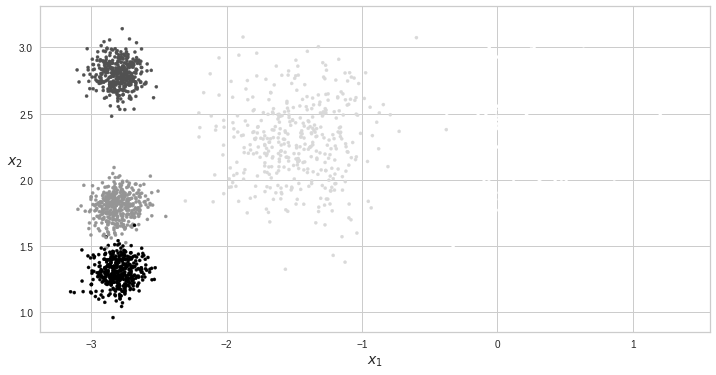

In [7]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
     [-2.8,  2.8], [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.rcParams["figure.figsize"] = (12, 6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [8]:
cluster_data = setup(data = pd.DataFrame(X), silent=True)

,Description,Value
0,session_id,426
1,Original Data,"(2000, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2000, 2)"
9,CPU Jobs,-1


In [9]:
model = create_model('kmeans')
model

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6885,8318.142,0.4491,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=426, tol=0.0001, verbose=0)

### visualization
* 'cluster' - Cluster PCA Plot (2d)              
* 'tsne' - Cluster TSnE (3d)
* 'elbow' - Elbow Plot 
* 'silhouette' - Silhouette Plot         
* 'distance' - Distance Plot   
* 'distribution' - Distribution Plot

In [10]:
plot_model(model)

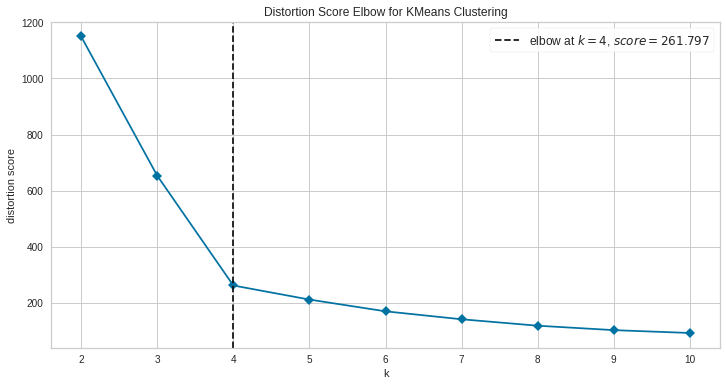

In [11]:
plot_model(model, plot='elbow')

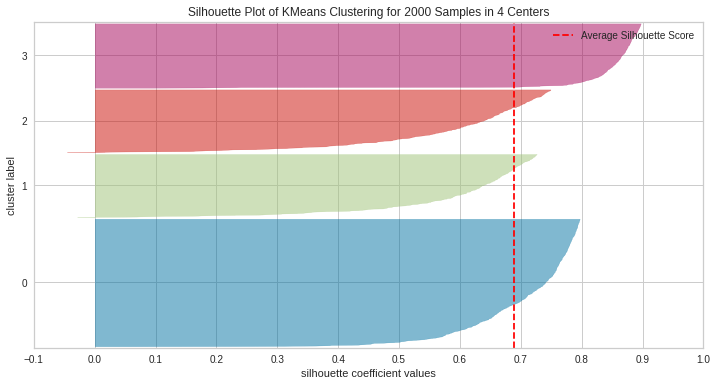

In [12]:
plot_model(model, plot='silhouette')

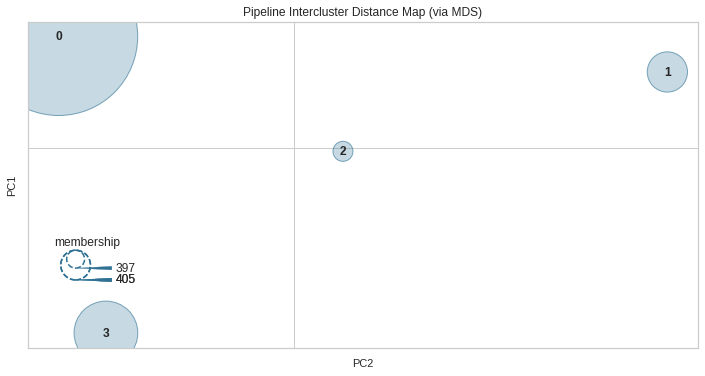

In [13]:
plot_model(model, plot='distance')

In [14]:
plot_model(model, plot='distribution')

In [15]:
plot_model(model, plot='tsne')

##**Anomaly detection**

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
from pycaret.anomaly import *
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
anomaly = setup(boston, silent=True, normalize = True)

,Description,Value
0,session_id,3953
1,Original Data,"(506, 13)"
2,Missing Values,False
3,Numeric Features,12
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(506, 14)"
9,CPU Jobs,-1


In [ ]:
iforest = create_model('iforest')
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=3953, verbose=0)


In [ ]:
iforest_results = assign_model(iforest)
iforest_results.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Anomaly,Anomaly_Score
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0,-0.128168
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0,-0.172330
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0,-0.159242
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0,-0.144948
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0,-0.150833


In [ ]:
plot_model(iforest, plot = 'tsne')

In [ ]:
unseen_data = boston.loc[0:2]
unseen_predictions = predict_model(iforest, data=unseen_data)
unseen_predictions.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Anomaly,Anomaly_Score
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0,-0.128168
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0,-0.172330
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0,-0.159242


In [ ]:
compare_models()

NameError: ignored

# End